<a href="https://colab.research.google.com/github/Guhan2348519/lab-task/blob/main/2348519_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/insurance - insurance.csv')

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data_encoding= pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [9]:
X = data_encoding.drop('charges', axis=1)
y = data_encoding['charges']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
rss = sum((y_pred - y_test)**2)
explained_var = explained_variance_score(y_test, y_pred)

In [12]:
print("Mean Absolute Error(MAE):", mae)
print("Mean Squared Error(MSE):", mse)
print("Root Mean Squared Error(RMSE):", rmse)
print("R-squared (R2) score:", r2)
print("Residual Sum of Squares(RSS):", rss)
print("Explained Variance Score:", explained_var)

Mean Absolute Error (MAE): 4181.19447375365
Mean Squared Error (MSE): 33596915.85136145
Root Mean Squared Error (RMSE): 5796.284659276273
R-squared (R2) score: 0.7835929767120724
Residual Sum of Squares (RSS): 9003973448.16487
Explained Variance Score: 0.7839025861417649


In [13]:
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
             Feature   Coefficient
4        smoker_yes  23651.128856
2          children    425.278784
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


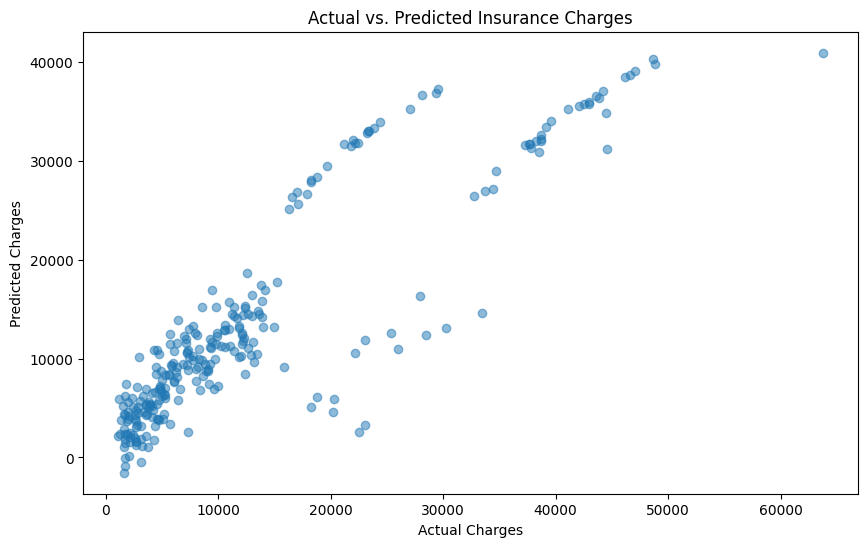

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Insurance Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

To reduce insurance costs, individuals can focus on maintaining a healthy lifestyle, quitting smoking, and considering preventive healthcare measures.